<a href="https://colab.research.google.com/github/Edrasen/Advanced_Neuronal_Networks/blob/main/Color_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image,ImageOps
import os
import math
import json
from io import StringIO
import skimage as ski
from skimage import data, io, filters, feature, segmentation, morphology, color
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import corner_harris, corner_subpix, corner_peaks

# Procesamiento de la imagen

In [2]:
!git clone https://github.com/Edrasen/Advanced_Neuronal_Networks

fatal: destination path 'Advanced_Neuronal_Networks' already exists and is not an empty directory.


In [3]:
%cd Advanced_Neuronal_Networks/
!pwd

/content/Advanced_Neuronal_Networks
/content/Advanced_Neuronal_Networks


In [4]:
!ls

colores      foto.jpg		     Test_forma2.json  Train_color.json
figuras.jpg  Shape_classifier.ipynb  Test_forma.json   Train_forma.json
Forma	     Test_color.json	     Train


In [5]:
figuras = os.path.join("figuras.jpg")
foto = os.path.join("foto.jpg")

In [6]:
fig = Image.open(figuras).convert('L')
fot = Image.open(foto).convert('L')

In [7]:
m_figurs = np.array(fig)
m_foto = np.array(fot)

In [8]:
print(m_figurs.shape)
print(m_foto.shape)

(720, 960)
(244, 322)


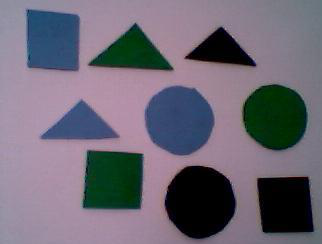

In [9]:
my_foto = Image.open(foto)
my_foto

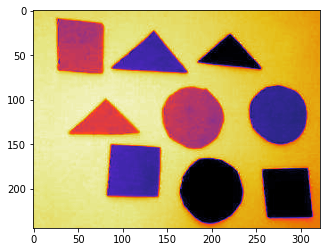

In [10]:
nfoto = ski.util.invert(m_foto)
plt.imshow(nfoto, cmap='CMRmap_r')

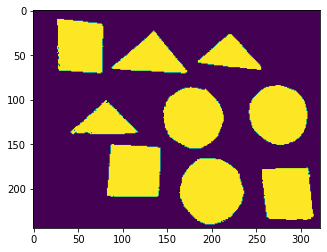

In [11]:
thresh = filters.threshold_otsu(nfoto)
umbral_foto = morphology.opening(nfoto > thresh, morphology.square(1))
plt.imshow(umbral_foto)

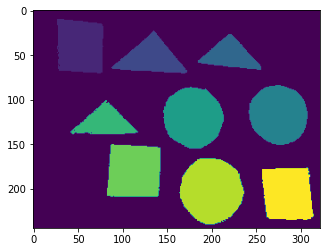

In [12]:
label_image=ski.measure.label(umbral_foto)
plt.imshow(label_image)

In [13]:
regions = ski.measure.regionprops(label_image)

In [14]:
coordinates = []
for region in regions:
  coordinates.append(region['bbox'])

In [15]:
print(coordinates)

[(10, 27, 71, 79), (23, 88, 71, 173), (27, 185, 67, 256), (84, 242, 151, 308), (86, 146, 155, 214), (101, 42, 139, 118), (150, 83, 209, 143), (166, 164, 240, 237), (176, 257, 235, 315)]


In [16]:
def get_medium(coords): #auxiliar funtion to get center coordinate in each figure
  medy = (coords[0] + coords[2])/2
  medx = (coords[1] + coords[3])/2
  return int(medx),int(medy)

In [17]:
mediums = []
for i in range (0,9):
  med = get_medium(coordinates[i])
  mediums.append(med)

In [18]:
print(mediums)

[(53, 40), (130, 47), (220, 47), (275, 117), (180, 120), (80, 120), (113, 179), (200, 203), (286, 205)]


(53, 40)
(130, 47)
(220, 47)
(275, 117)
(180, 120)
(80, 120)
(113, 179)
(200, 203)
(286, 205)


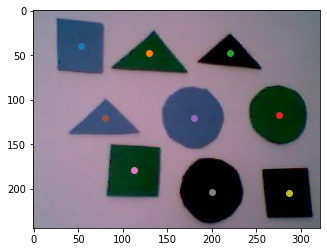

In [19]:
#getting cetral coordinate of each figure
plt.figure()
plt.imshow(my_foto)
for med in mediums:
  print(med)
  plt.scatter(med[0],med[1])

In [20]:
arr_foto = np.array(my_foto)
arr_foto = ImageOps.solarize(my_foto)
arr_foto = np.array(arr_foto)

# Preparando los datos

Azul = [0,0,1] 

Verde = [0,1,0]

Negro = [1,0,0]

In [65]:
def Lector_de_imagenes(Train_dir,jsonfile):
    Train_data=[]
    Tags=[]
    with open(jsonfile) as data_file:    
         etiquetas = json.load(data_file)
    for img in os.listdir(Train_dir):
        try :
            #print(img) 
            imgtag=etiquetas[img]
            #print(imgtag)
            Tags.append(imgtag)
        except :
            print("Tag error: "+img)
        try : 
            imgpath=os.path.join(Train_dir,img)
            img = Image.open(imgpath)
            Train_data.append(np.array(img)[:,:,0:3][100,100]) 
        except :
            print("file error: "+img)
        #np.save(file+".npy",Train_data)
    return np.array(Train_data),Tags

In [66]:
def Lector_de_imagenes_testing(jsonfile):
    Train_data=[] #Arreglo de datos
    Tags=[] #Arreglo de etiquetas
  
    #img = Image.open("foto.jpg")

    with open(jsonfile) as data_file: #Abrir el archivo Jason  
         etiquetas = json.load(data_file) #Guardar la lista del archivo jason en un arreglo
         print(etiquetas)
    #Tomamos cada bbox y momento de hu de cada objeto
    for med in mediums:
        try:
            imgtag=etiquetas[format(med)]
            Tags.append(imgtag)
        except:
            print("Tag error: "+format(med)) 
        try:
            color = arr_foto[:,:,0:3][med[1],med[0]]
            Train_data.append(arr_foto[:,:,0:3][med[1],med[0]]) 
        except:
            print("Tag error: "+format(med))
    print(Tags)
    return np.array(Train_data),Tags 

In [67]:
!git pull

Already up to date.


In [68]:
X_train, y_train = Lector_de_imagenes("colores/Train", "Train_color.json")

Tag error: desktop.ini
file error: desktop.ini


In [69]:
y_train

[[0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0]]

In [70]:
!ls

colores      foto.jpg		     Test_forma2.json  Train_color.json
figuras.jpg  Shape_classifier.ipynb  Test_forma.json   Train_forma.json
Forma	     Test_color.json	     Train


In [71]:
#print(arr_foto[180,120])

In [72]:
X_test, y_test = Lector_de_imagenes_testing("Test_color.json")

{'(53, 40)': [0, 0, 1], '(130, 47)': [0, 1, 0], '(220, 47)': [1, 0, 0], '(275, 117)': [0, 1, 0], '(180, 120)': [0, 0, 1], '(80, 120)': [0, 0, 1], '(113, 179)': [0, 1, 0], '(200, 203)': [1, 0, 0], '(286, 205)': [1, 0, 0]}
[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0]]


In [73]:
X_test

array([[ 43,  77, 114],
       [  0,  58,  14],
       [  1,   2,   0],
       [  0,  39,   3],
       [ 51,  70, 110],
       [ 63,  78, 121],
       [  0,  57,  16],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

# Ajustar parámetros del modelo

In [81]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-6,
                  hidden_layer_sizes=(10, 3))

In [82]:
clfcolor.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [83]:
pred = clfcolor.predict(X_test)

# Evaluar el modelo

In [84]:
def ClassDetector(onehot):
  output=[]
  for case in onehot:
    output.append(np.argmax(case))
  return output

In [85]:
predclass = ClassDetector(pred)
yclass = ClassDetector(y_test)
print(yclass)
print(predclass)

[2, 1, 0, 1, 2, 2, 1, 0, 0]
[2, 1, 1, 1, 2, 2, 1, 0, 0]


In [86]:
print(accuracy_score(predclass,yclass))

0.8888888888888888


In [87]:
print(confusion_matrix(predclass,yclass))

[[2 0 0]
 [1 3 0]
 [0 0 3]]
